In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving house_sales.csv to house_sales.csv


In [4]:
for filename in uploaded.keys():
  data=pd.read_csv(filename)

In [5]:
print("Shape of data:", data.shape)
print(data.head())
print(data.info())

data.drop(['id', 'date'], axis=1, inplace=True, errors='ignore')

data.fillna(data.median(numeric_only=True), inplace=True)

Shape of data: (22687, 22)
  DocumentDate  SalePrice  PropertyID   PropertyType          ym  zhvi_px  \
0   2014-09-16     280000     1000102      Multiplex  2014-09-01   405100   
1   2006-06-16    1000000     1200013  Single Family  2006-06-01   404400   
2   2007-01-29     745000     1200019  Single Family  2007-01-01   425600   
3   2008-02-25     425000     2800016  Single Family  2008-02-01   418400   
4   2013-03-29     240000     2800024  Single Family  2013-03-01   351600   

   zhvi_idx  AdjSalePrice  NbrLivingUnits  SqFtLot  ...  Bathrooms  Bedrooms  \
0  0.930836      300805.0               2     9373  ...       3.00         6   
1  0.929228     1076162.0               1    20156  ...       3.75         4   
2  0.977941      761805.0               1    26036  ...       1.75         4   
3  0.961397      442065.0               1     8618  ...       3.75         5   
4  0.807904      297065.0               1     8620  ...       1.75         4   

   BldgGrade  YrBuilt  YrReno

In [7]:
data['house_age'] = 2025 - data['YrBuilt']
data['since_renovation'] = np.where(data['YrRenovated'] > 0, 2025 - data['YrRenovated'], 0)

In [8]:
data.drop(['YrBuilt', 'Yr_Renovated'], axis=1, inplace=True, errors='ignore')


In [12]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

In [14]:
X = data.drop(['DocumentDate','ym','PropertyType'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Model Coefficients: [ 3.46629177e+05  8.77319207e-12 -2.97580585e-10  2.64907918e-10
 -2.39661254e-10  1.89963795e-11  2.47665213e-11 -9.10890152e-11
  3.77701565e-11 -6.10229413e-11  2.40702872e-12  9.83640236e-12
  7.07667019e-11  4.18187476e-11 -1.01659684e-10 -3.88735947e-11
 -1.86845760e-11 -4.16763961e-11 -5.09724952e-11 -4.23082324e-11]
Intercept: 507924.37598624756
Mean Squared Error: 2.0642536366769527e-19
R2 Score: 1.0


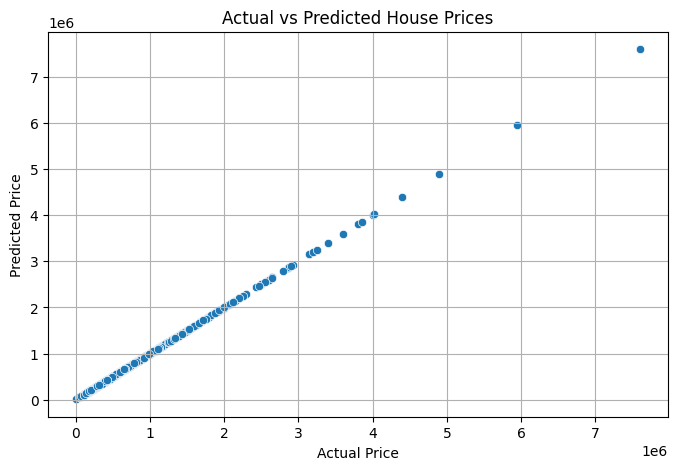

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

In [40]:
sample_house = pd.DataFrame({
    'PropertyID': [0],
    'zhvi_px': [405100],
    'zhvi_idx': [0.930836],
    'AdjSalePrice': [300805.0],
    'NbrLivingUnits': [2],
    'SqFtLot': [2000],
    'SqFtTotLiving': [2500],
    'SqFtFinBasement': [500],
    'Bathrooms': [3.0],
    'Bedrooms': [6],
    'BldgGrade': [7],
    'TrafficNoise': [0],
    'LandVal': [70000],
    'ImpsVal': [229000],
    'ZipCode': [98002],
    'NewConstruction': [False],
    'house_age': [34],
    'since_renovation': [0],
    'SalePrice':0,
    'PropertyType_Single Family':0,
})
PredictedmodelResult = model.predict(sample_house)
print(PredictedmodelResult[0])

507924.37607410725


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
